# Welcome to QuSBT!

## Description

Generating a test suite for a quantum program such that it has the maximum number of failing tests is an optimization problem. For such optimization, search-based testing has shown promising results in the context of classical programs. Here we introduce a test generation tool for quantum programs based on a genetic algorithm, called QuSBT (Search-based Testing of Quantum Programs). QuSBT automates the testing of quantum programs, with the aim of finding a test suite having the maximum number of failing test cases. QuSBT utilizes IBM’s Qiskit as the simulation framework for quantum programs.

### Test oracles

- uof:  the output returned by the program for a given input is not allowed by the program specification;
- wodf: the output values returned by multiple executions for a given input follow a probability distribution significantly different from the one specified by the program specification.

## How to use QuSBT
Please prepare the **quantum program file** and the **configuration file**, then input them into the QuSBT tool. Here we introduce the example algorithm *IQFT*, and the introduce the structure of the two input files.

### Example Algorithm IQFT.

Let's take **IQFT** algorithm as an example! This algorithm uses quantum computing principles to store and modify quantum or classical data efficiently.

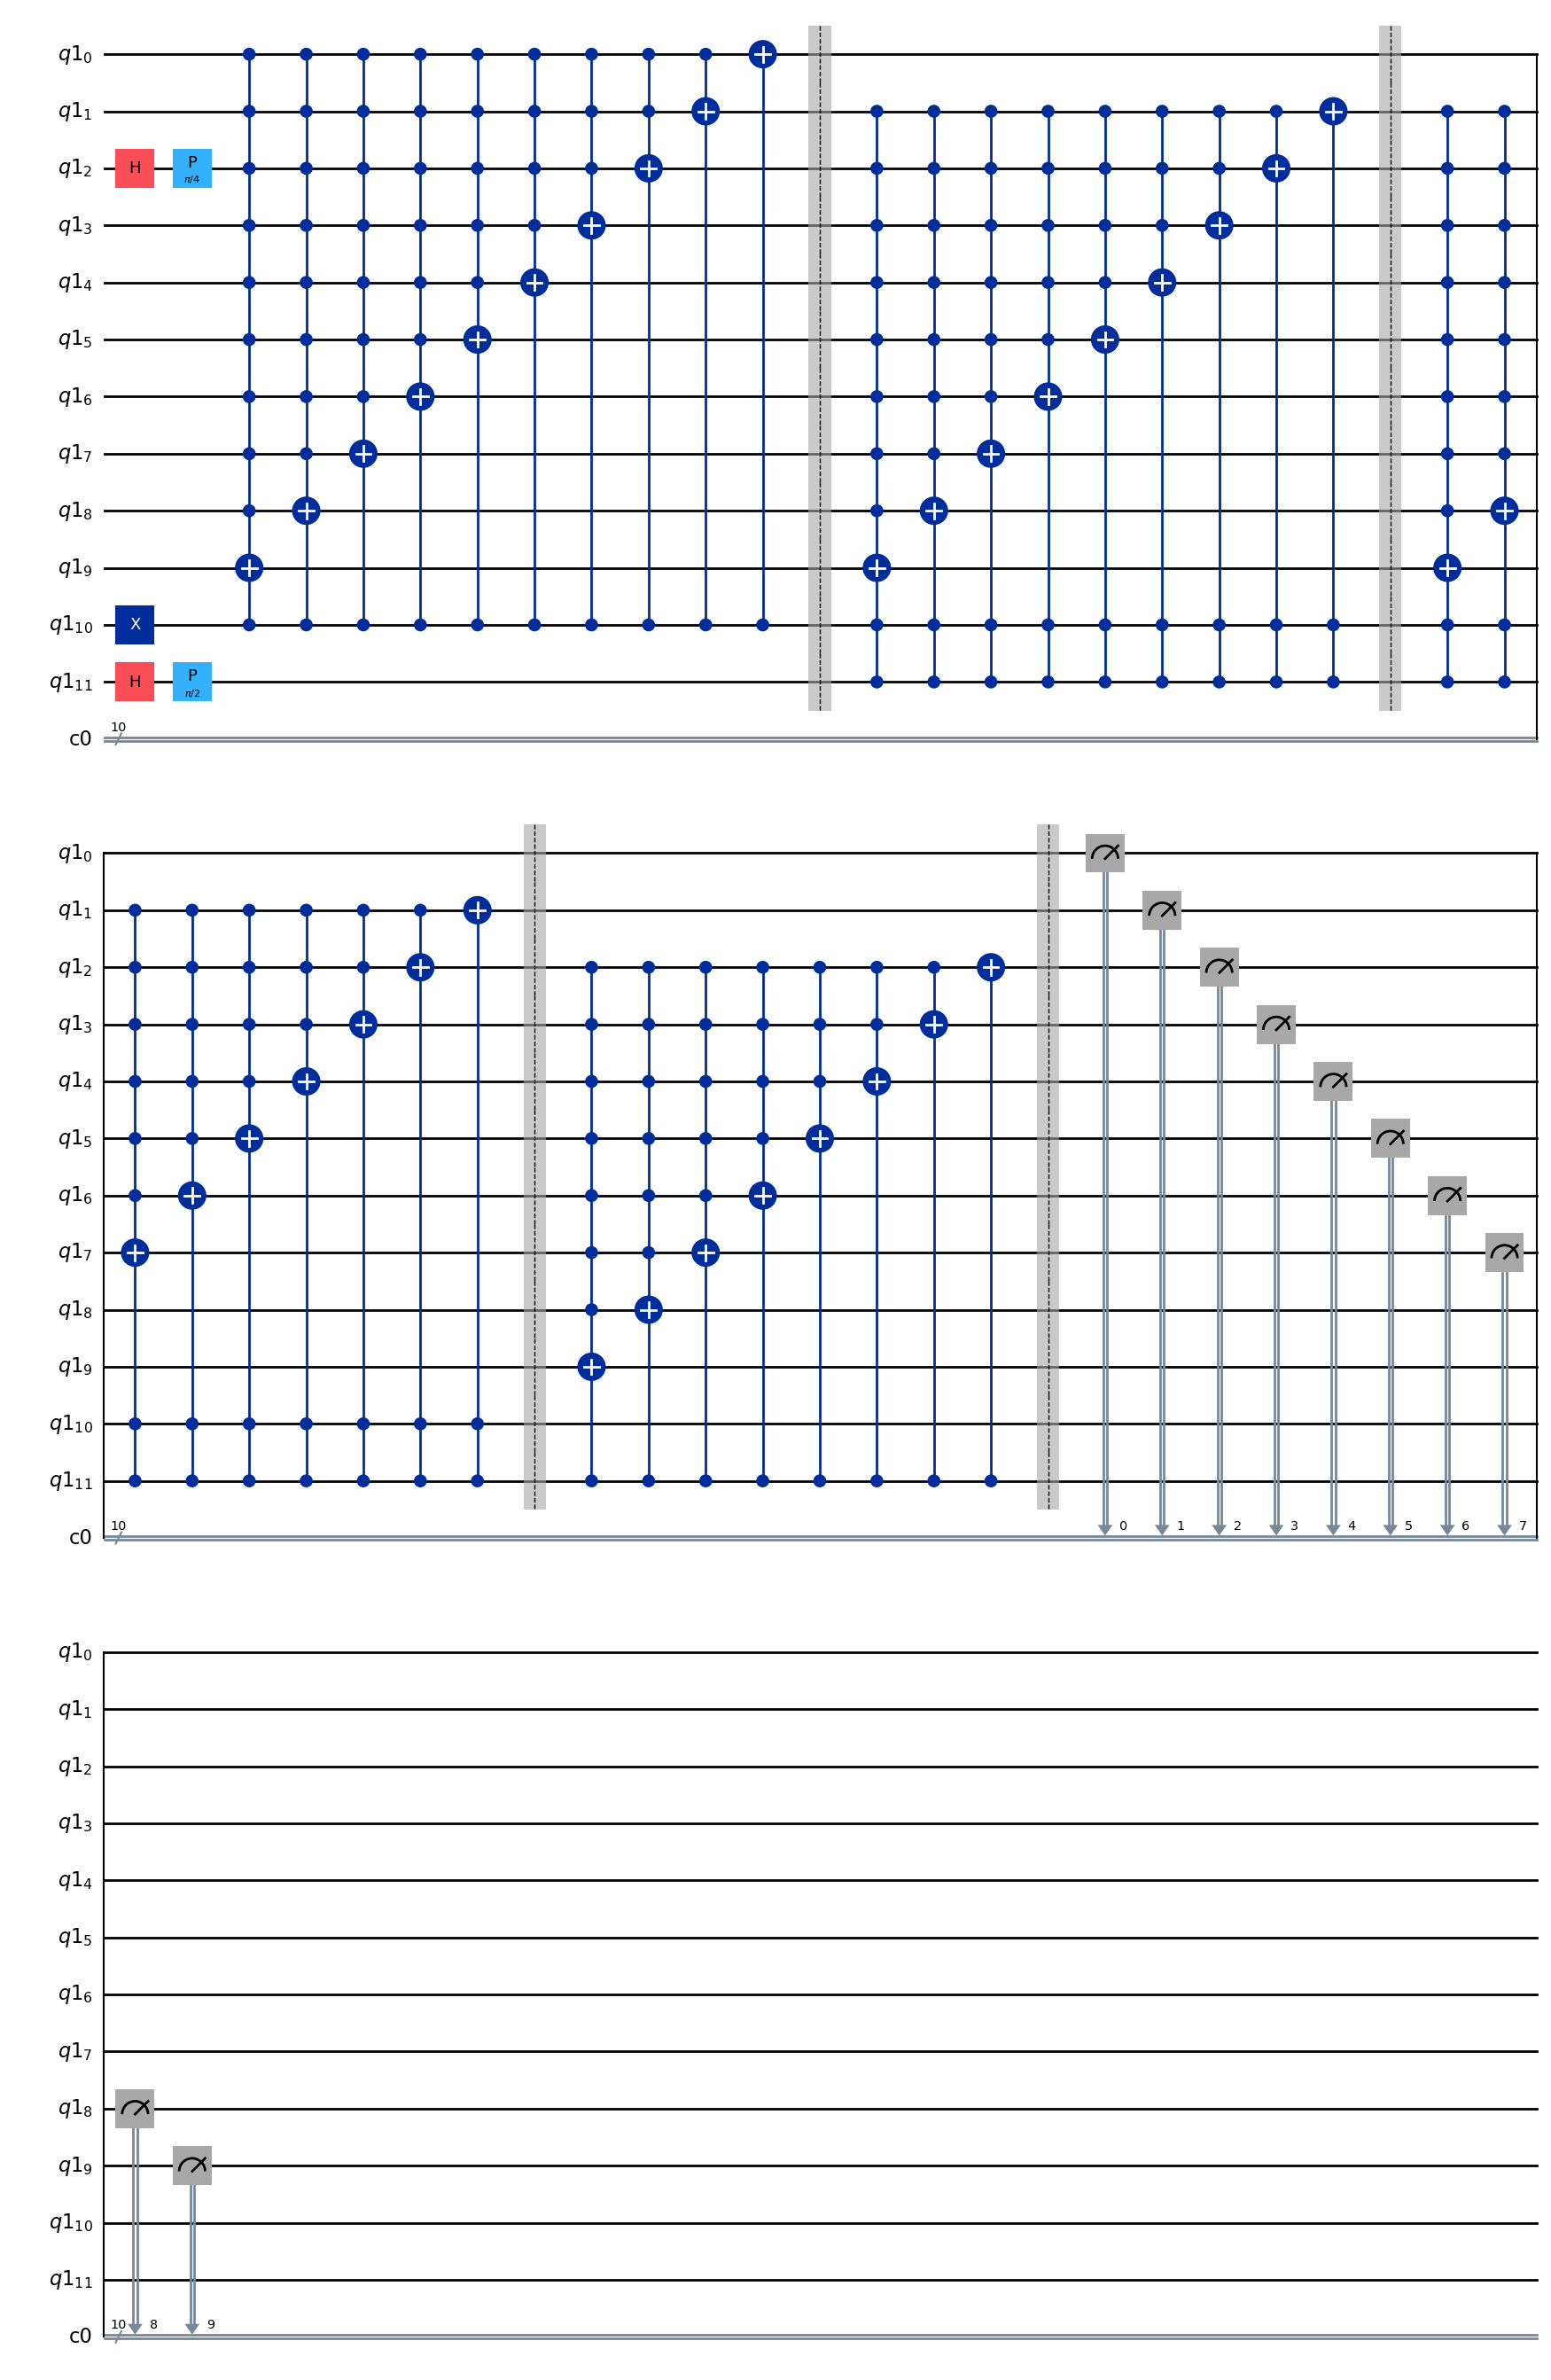

In [1]:
import math

from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator

q = QuantumRegister(12)
c = ClassicalRegister(10)
qc = QuantumCircuit(q, c)
qc.h(2)
qc.p(math.pi / 4, 2)

qc.x(10)
qc.h(11)
qc.p(math.pi / 2, 11)

for i in range(9):
    control = []
    control.append(10)
    for j in range(9 - i):
        control.append(j)
    qc.mcx(control, 9 - i)
qc.cx(10, 0)

qc.barrier()

for i in range(8):
    control = []
    control.append(10)
    control.append(11)
    for j in range(1, 9 - i):
        control.append(j)
    qc.mcx(control, 9 - i)
qc.ccx(10, 11, 1)

qc.barrier()

for i in range(8):
    control = []
    control.append(10)
    control.append(11)
    for j in range(1, 9 - i):
        control.append(j)
    qc.mcx(control, 9 - i)
qc.ccx(10, 11, 1)

qc.barrier()

for i in range(7):
    control = []
    control.append(11)
    for j in range(2, 9 - i):
        control.append(j)
    qc.mcx(control, 9 - i)
qc.cx(11, 2)

qc.barrier()

qc.measure([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

qc.draw(output="mpl")

In [2]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts(qc)

{'0000001101': 261, '0000000001': 264, '0000000101': 253, '0000001001': 246}

### Quantum Program File
Here we show the structure of this input file:
- The quantum program should be written with Qiskit in Python.
- The code has to be structured in a function named as 'run' with one parameter that refers to the quantum circuit.
- Users only need to add gates to the circuit and measure output qubits to get the output. They don't need to set any register, initialize circuits, choose the simulation, or execute the circuits in 'run' function.

### Example Quantum Program File
Here is the corresponding quantum program file of *QRAM.py* for Quito.

In [3]:
import math


def run(qc):
    qc.h(2)
    qc.p(math.pi / 4, 2)

    qc.x(10)
    qc.h(11)
    qc.p(math.pi / 2, 11)

    for i in range(9):
        control = []
        control.append(10)
        for j in range(9 - i):
            control.append(j)
        qc.mcx(control, 9 - i)
    qc.cx(10, 0)

    qc.barrier()

    for i in range(8):
        control = []
        control.append(10)
        control.append(11)
        for j in range(1, 9 - i):
            control.append(j)
        qc.mcx(control, 9 - i)
    qc.ccx(10, 11, 1)

    qc.barrier()

    for i in range(8):
        control = []
        control.append(10)
        control.append(11)
        for j in range(1, 9 - i):
            control.append(j)
        qc.mcx(control, 9 - i)
    qc.ccx(10, 11, 1)

    qc.barrier()

    for i in range(7):
        control = []
        control.append(11)
        for j in range(2, 9 - i):
            control.append(j)
        qc.mcx(control, 9 - i)
    qc.cx(11, 2)

    qc.barrier()

    qc.measure([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Configuration File
Here we show the structure of this the program configuration file. It is an INI file, which contains three sections defined by headers enclosed in brackets [ ] and contains several properties represented by key-value pairs, called properties. This configuration file describes the program information, QuSBT execution information and program specification of the algorithm under test. Some properties are required and some properties are optional.

Here is the corresponding configuration file for **IQFT** algorithm. (The complete version can be found in [this repo](https://github.com/Simula-COMPLEX/qusbt-tool))

### Test with QuSBT Directly

Import qusbt and use qusbt method directly and the parameter is the absolute path of the configuration file.

In [10]:
from qusbt.qusbt_search import qusbt

# Input the root of the configuration file
qusbt("/home/user/IQ.ini")

We can check the process bar to see whether quito is running. After the whole process is finished, you can find the result file in a folder named **"result"**, which is located in the same directory of the **quantum program file**.

### Submit with by Slurm Job

Please first create an **executing file** and a **slurm file** to run the experiment.

Here is the executing file *quito_test.py*.

In [ ]:
import time

from qusbt.qusbt_search import qusbt

start = time.time()
qusbt("/home/user/IQ.ini")
end = time.time()

print(end - start)

Here is the slurm file. It shows the configuration of running on a CPU node.

The following is the version of configuration file running on a GPU node.

Please prepare the following files before submitting to the eX3.

- quantum program file
- configuration file
- executing file
- slurm file

Run the following code to submit the job.

In [9]:
import os

command = "sbatch /home/user/qusbt.slurm"
os.system(command)

Submitted batch job 293033


0

It will print the job number after a successful submission. You can check the running statu by using the "squeue" command. After completing the execution, you can check the file *slurm-[job number].out* to check the the execution time. Result files can be found in the same 